In [1]:
import json
import numpy as np
import os
from matplotlib import pyplot as plt

In [11]:
# Load aggregated data
with open('output.json', 'r') as f:
    doc = json.load(f)

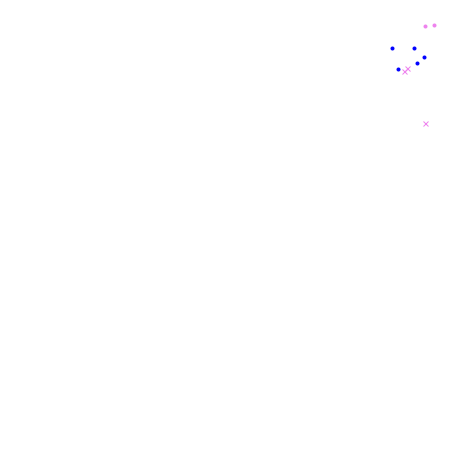

In [12]:
output_folder = 'output'
if not os.path.exists(output_folder):
    os.mkdir(output_folder)
teams = ('teamOne', 'teamTwo')
colors = ('blue', 'violet')
player_respawns = np.zeros((2, 5))
last_positions = None
for time in sorted(doc.keys(), key=int):
    new_positions = np.array([doc[time]['positions'][team] for team in teams])
    # Check champion deaths
    events = doc[time]['events']
    for event in events:
        if event['eventType'] == 'DIED':
            player_index = int(event['player'][6:]) - 1
            team = 1 if player_index > 4 else 0
            player_index = player_index % 5
            player_respawns[team, player_index] = int(event['gameTime']) + int(event['respawnTime'])
    if last_positions is not None:
        movements = new_positions - last_positions
        plt.close()
        plt.figure(figsize=(8,8))
        plt.axis('off')
        plt.xlim([0, 15000])
        plt.ylim([0, 15000])
        for team, color in enumerate(colors):
            team_movements = movements[team]
            for player in range(5):
                x, y = last_positions[team, player]
                dx, dy = movements[team, player]
                if int(time) < player_respawns[team, player]:
                    plt.plot(x, y, marker='x', markersize=5, color=color)
                elif dx == 0 and dy == 0:
                    plt.plot(x, y, marker='o', markersize=3, color=color)
                else:
                    plt.arrow(x, y, dx, dy, color=color, width=5, head_width=100)
        # plt.title(f'{key}')
        plt.savefig(os.path.join(output_folder, f'{time}.png'))
        # plt.show()
    last_positions = new_positions